Gradient descent in 1D

In [3]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [6]:
# function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
    return 6*x - 3

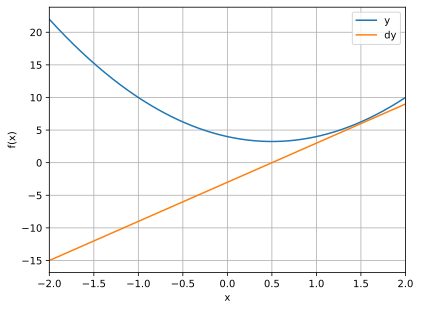

In [7]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [74]:
# random starting point
localmin = np.random.choice(x,1)        #Dal vettore x seleziona un solo valore
print(localmin)

# learning parameters
learning_rate = .01
"""
Learning rate:
Diminuendo questo valore si può vedere come la derivata vada nel verso giusto ma molto lentamente
Di fatto facciamo dei passi molto molto piccoli ogni volta per avvicinarci alla derivata = 0
Quando abbiamo una learning_rate bassa occorre aumentare il numero di iterazioni, perchè impiegherà più tempo per imparare
Per far si che arrivi all'obiettivo occorre aumentare le training_epochs (ex. =1000)
Non è sempre detto che learning_rate = 0.1 e training_epochs = 100 siano i valori ottimali
"""                  
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[1.874]


array([0.5028234])

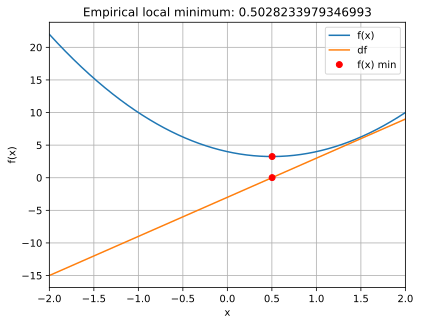

In [75]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

Store the model parameters and outputs on each iteration

In [76]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 1
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))                 #vettore in cui verranno salvanti localmin e grad
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad



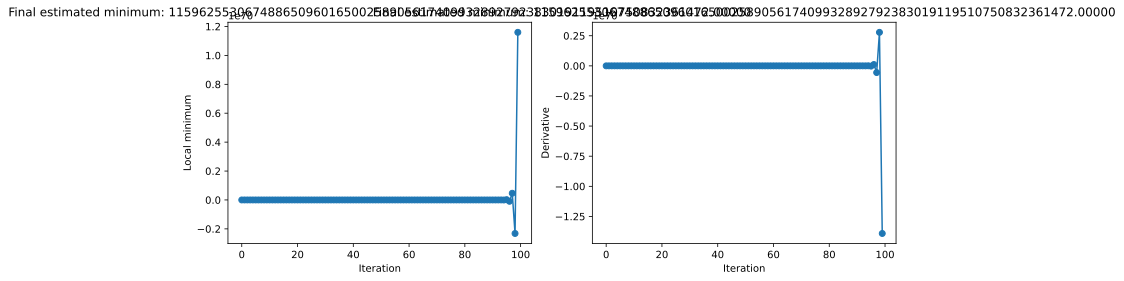

In [77]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()
#All'inizio abbiamo una derivata grande e pian piano diventa sempre più piccola avvicinandosi alla derivata = 0 (obiettivo della discesa secondo gradiente)

In [ ]:

# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 

#1
# random starting point
localmin = np.random.choice(x,1)
 
# learning parameters
learning_rate = .001
training_epochs = 1000
threshold = 0.01
 
# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
	grad = deriv(localmin)
	if grad < threshold:
		modelparams = modelparams[:i, :]
		break
	localmin = localmin - learning_rate*grad
	modelparams[i,:] = localmin,grad